In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mk = pd.read_csv('marketing_campaign.csv')

In [ ]:
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
mk=mk.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
mk.shape

(2240, 29)

In [ ]:
mk.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [ ]:
# converting columns to DateTime format
from datetime import date
mk['Year_Birth'] = pd.to_datetime(mk['Year_Birth'], format ='%Y') # int 자료형을 datetime으로 변환
mk['Dt_Customer'] = pd.to_datetime(mk['Dt_Customer'])  # object 자료형을 datetime으로 변환

# 이상치 제거

1. age 100살 이상 지우기

In [ ]:
a = mk[mk['Age'] >= 100].index
mk.drop(a, inplace=True)

KeyError: ignored

In [ ]:
 mk[mk['Age'] >= 100].index

KeyError: ignored

2. income 결측치 24개 지우기

In [ ]:
mk = mk.dropna()

In [ ]:
mk.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

3. Income 이상치 8개 지우기

In [ ]:
b = mk[mk['Income'] > 140000].index
mk.drop(b, inplace=True)

## 파생변수 만들기

In [ ]:
mk['Marital_Status'] = mk['Marital_Status'].replace(['Married', 'Together'],'relationship')
mk['Marital_Status'] = mk['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [ ]:
mk['Kids'] = mk['Kidhome'] + mk['Teenhome']
mk['Expenses'] = mk['MntWines'] + mk['MntFruits'] + mk['MntMeatProducts'] + mk['MntFishProducts'] + mk['MntSweetProducts'] + mk['MntGoldProds']
mk['TotalAcceptedCmp'] = mk['AcceptedCmp1'] + mk['AcceptedCmp2'] + mk['AcceptedCmp3'] + mk['AcceptedCmp4'] + mk['AcceptedCmp5'] + mk['Response']
mk['NumTotalPurchases'] = mk['NumWebPurchases'] + mk['NumCatalogPurchases'] + mk['NumStorePurchases'] + mk['NumDealsPurchases']

In [ ]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
mk=mk.drop(columns=col_del,axis=1)
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [ ]:
mk['Age'] = 2015 - mk["Year_Birth"]

In [ ]:
mk['Education'] = mk['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
mk['Education'] = mk['Education'].replace(['Basic'], 'UG')

In [ ]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
mk['Dt_Customer'] = pd.to_datetime(mk.Dt_Customer)
mk['first_day'] = '01-01-2015'
mk['first_day'] = pd.to_datetime(mk.first_day)
mk['day_engaged'] = (mk['first_day'] - mk['Dt_Customer']).dt.days

In [ ]:
mk=mk.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
mk.shape

(2208, 9)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
cate = []
for i in mk.columns:
    if (mk[i].dtypes == "object"):
        cate.append(i)

print(cate)

lbl_encode = LabelEncoder()
for i in cate:
    mk[i]=mk[[i]].apply(lbl_encode.fit_transform)

['Education', 'Marital_Status']


In [ ]:
mk1 = mk.copy()

In [ ]:
scaled_features = StandardScaler().fit_transform(mk1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=mk1.index, columns=mk1.columns)

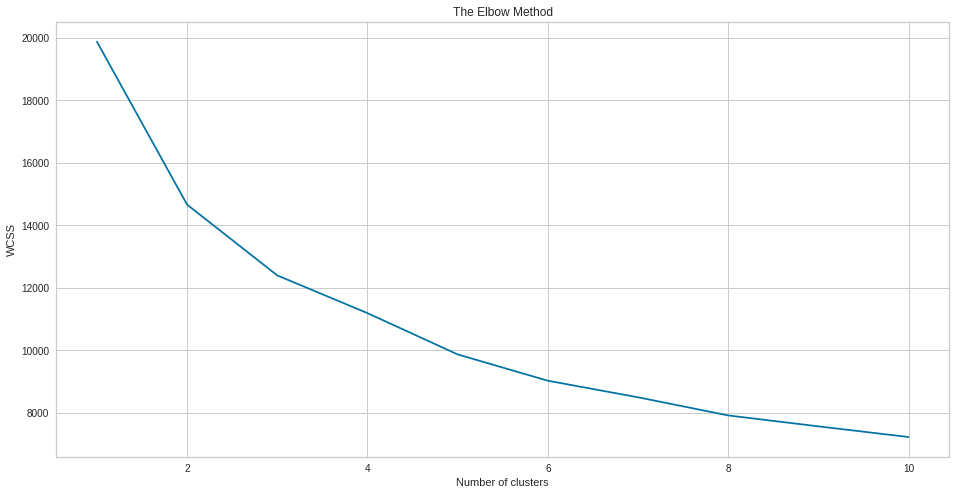

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

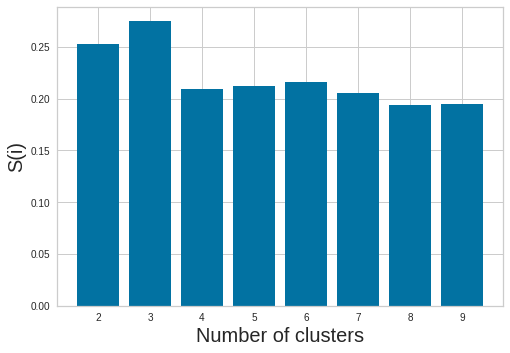

In [ ]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [ ]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

mk['cluster'] = pred + 1

In [ ]:
mk.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,997,1
1,0,0,46344.0,2,27,0,6,61,151,2
2,0,1,71613.0,0,776,0,21,50,498,1
3,0,1,26646.0,1,53,0,8,31,91,2
4,0,1,58293.0,1,422,0,19,34,347,2


위에는 다시

In [ ]:
#제품에 지출된 총액
mk['TotalMntSpent'] = mk['MntWines'] + mk['MntFruits'] + mk['MntMeatProducts'] + mk['MntFishProducts'] + mk['MntSweetProducts'] + mk['MntGoldProducts']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#총 구매 건수
mk['TotalNumPurchases'] = mk['NumWebPurchases'] + mk['NumCatalogPurchases'] + mk['NumStorePurchases'] + mk['NumDealsPurchases']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 승인된 총 캠페인 수
mk['Total_Acc_Cmp'] = mk['AcceptedCmp1'] + mk['AcceptedCmp2'] + mk['AcceptedCmp3'] + mk['AcceptedCmp4'] + mk['AcceptedCmp5'] + mk['Response']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 결혼상태에 따른 파트너 유무
mk["Partner"]=mk["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mk.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'TotalMntSpent', 'TotalNumPurchases', 'Total_Acc_Cmp', 'Partner'],
      dtype='object')

In [ ]:
mk.drop(columns=['Marital_Status'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# 가구 내 총 자녀 수
mk["Children"] = mk["Kidhome"] +  mk["Teenhome"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 가족수
mk["Family_Size"] = mk["Partner"].replace({"No": 1, "Yes":2})+ mk["Children"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#부모인지 아닌지
mk["Is_Parent"] = np.where(mk.Children> 0, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 교육 수준을 세 그룹으로 세분화
mk["Education_Level"]=mk["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 가입한 날짜, 월 및 연도에 대한 열 추가
mk['Year_Joined'] = mk['Dt_Customer'].dt.year # 연도 추출
mk['Month_Joined'] = mk['Dt_Customer'].dt.strftime("%B") # strftime: 날짜 형식 변환 %B:locale 월
mk['Day_Joined'] = mk['Dt_Customer'].dt.day_name() # day_name: 요일을 문자열로 추출

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
mk["Dt_Customer"].dt.year.min() , mk["Dt_Customer"].dt.year.max()

# 연령 및 연도 생성_고객
mk['Age'] = (mk["Dt_Customer"].dt.year.max()) - (mk['Year_Birth'].dt.year)
mk['Years_Customer'] = (mk["Dt_Customer"].dt.year.max()) - (mk['Dt_Customer'].dt.year)
mk['Days_Customer'] = (mk["Dt_Customer"].max()) - (mk['Dt_Customer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
# 나이에 따른 그룹 나누기
mk['Age_Group'] = pd.cut(x = mk['Age'], bins = [1, 17, 24, 44, 64, 150],
                         labels = ['Under 18','Young adult','Adult','Middel Aged','Senior Citizen'])

## 필요없는 변수 삭제

In [ ]:
print(mk.shape)
# 변수 29 -> 39개
mk.head()

(2240, 39)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Family_Size,Is_Parent,Education_Level,Year_Joined,Month_Joined,Day_Joined,Age,Years_Customer,Days_Customer,Age_Group
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,0,Graduate,2012,April,Monday,57,2,971 days,Middel Aged
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,3,1,Graduate,2014,August,Sunday,60,0,125 days,Middel Aged
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,2,0,Graduate,2013,August,Wednesday,49,1,472 days,Middel Aged
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,3,1,Graduate,2014,October,Thursday,30,0,65 days,Adult
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,1,Postgraduate,2014,January,Sunday,33,0,321 days,Adult


In [ ]:
mk.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'TotalMntSpent', 'TotalNumPurchases',
       'Total_Acc_Cmp', 'Partner', 'Children', 'Family_Size', 'Is_Parent',
       'Education_Level', 'Year_Joined', 'Month_Joined', 'Day_Joined', 'Age',
       'Years_Customer', 'Days_Customer', 'Age_Group'],
      dtype='object')

In [ ]:
mk['Days_Customer'] = mk['Days_Customer'].dt.days.astype('int16')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# 문자영 데이터를 숫자형으로 
oe = OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']])
mk_education = pd.DataFrame(oe.fit_transform(mk[['Education_Level']]), columns=['Education_Level'])

In [ ]:
oe = OrdinalEncoder(categories=[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']])
mk_dayjoin = pd.DataFrame(oe.fit_transform(mk[['Day_Joined']]), columns=['Day_Joined'])

In [ ]:
oe = OrdinalEncoder(categories=[['January','February','March','October', 'April','May', 'June','July','August','September','November','December' ]])
mk_monthjoin = pd.DataFrame(oe.fit_transform(mk[['Month_Joined']]), columns=['Month_Joined'])

In [ ]:
mk_dummies=pd.get_dummies(mk[['Age_Group','Partner','Education','Marital_Status']],drop_first=True)

In [ ]:
mk.drop(['Education_Level','Age_Group','Partner','Education','Marital_Status','Day_Joined','Month_Joined' ],axis=1, inplace=True)

In [ ]:
mk1 = pd.concat([mk,mk_education,mk_dayjoin,mk_monthjoin ,mk_dummies], axis=1)

In [ ]:
mk1.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Days_Customer',
       'TotalMntSpent', 'TotalNumPurchases', 'Total_Acc_Cmp', 'Children',
       'Education_Level']
scaler = StandardScaler()
mk2 = mk1.copy()
mk2[num_cols] = scaler.fit_transform(mk2[num_cols])

In [ ]:
pd.options.display.max_columns = None
mk2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Family_Size,Is_Parent,Year_Joined,Age,Years_Customer,Days_Customer,Education_Level,Day_Joined,Month_Joined,Age_Group_Young adult,Age_Group_Adult,Age_Group_Middel Aged,Age_Group_Senior Citizen,Partner_Yes,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,0,0,0,0,0,1,1.679417,1.320826,0.621248,-1.264505,1,0,2012,0.985345,2,1.976745,-0.410013,1.0,4.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,0,-0.961275,-1.154596,-0.501912,1.396361,3,1,2014,1.235733,0,-1.667011,-0.410013,0.0,8.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,0,0.282673,0.799685,-0.501912,-1.264505,2,0,2013,0.317643,1,-0.172468,-0.410013,3.0,8.0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
3,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,0,-0.918094,-0.894025,-0.501912,0.065928,3,1,2014,-1.268149,0,-1.925433,-0.410013,4.0,3.0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,0,-0.305254,0.539114,-0.501912,0.065928,3,1,2014,-1.017761,0,-0.822831,1.123256,0.0,0.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
mk2['Marital_Status_YOLO'].value_counts()

0    2238
1       2
Name: Marital_Status_YOLO, dtype: int64

In [ ]:
mk2['Marital_Status_Alone'].value_counts()

0    2237
1       3
Name: Marital_Status_Alone, dtype: int64

In [ ]:
mk2['Age_Group_Young adult'].value_counts()

0    2179
1      61
Name: Age_Group_Young adult, dtype: int64

In [ ]:
mk2['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

AcceptedCmp3 , AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Marital_Status_Alone, Marital_Status_Widow, Marital_Status_YOLO

In [ ]:
mk2.isnull().sum()

Income                      24
Kidhome                      0
Teenhome                     0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProducts              0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Response                     0
TotalMntSpent                0
TotalNumPurchases            0
Total_Acc_Cmp                0
Children                     0
Family_Size                  0
Is_Parent                    0
Year_Joined                  0
Age                          0
Years_Customer               0
Days_Customer                0
Educatio

In [ ]:
mk2 = mk2.dropna()

In [ ]:
mk2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Family_Size,Is_Parent,Year_Joined,Age,Years_Customer,Days_Customer,Education_Level,Day_Joined,Month_Joined,Age_Group_Young adult,Age_Group_Adult,Age_Group_Middel Aged,Age_Group_Senior Citizen,Partner_Yes,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,0,0,0,0,0,1,1.679417,1.320826,0.621248,-1.264505,1,0,2012,0.985345,2,1.976745,-0.410013,1.0,4.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,0,-0.961275,-1.154596,-0.501912,1.396361,3,1,2014,1.235733,0,-1.667011,-0.410013,0.0,8.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,0,0.282673,0.799685,-0.501912,-1.264505,2,0,2013,0.317643,1,-0.172468,-0.410013,3.0,8.0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
3,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,0,-0.918094,-0.894025,-0.501912,0.065928,3,1,2014,-1.268149,0,-1.925433,-0.410013,4.0,3.0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,0,-0.305254,0.539114,-0.501912,0.065928,3,1,2014,-1.017761,0,-0.822831,1.123256,0.0,0.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from jenkspy import JenksNaturalBreaks
from yellowbrick.cluster import KElbowVisualizer

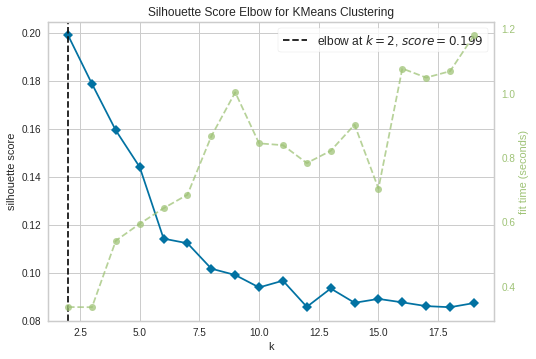

In [ ]:
# elbow method plot
km = KMeans()
visualizer = KElbowVisualizer(km, k = (2,20), locate_elbow=True, metric = 'silhouette')
X = mk2
visualizer.fit(X)
_ = visualizer.poof()

In [ ]:
# Function for Plotting Clusters
def plot_clusters(no_cluster, cluster_pred_values):
    for x in range(no_cluster):
        clustername = "cluster " + str(x)
        plt.scatter(
            X[cluster_pred_values == x, 0], X[cluster_pred_values == x, 1],
            s=50, c=np.random.rand(3,),
            edgecolor='black',
            label= clustername)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

# Function for Plotting Centroid (K-Means)
def plot_centroids(km_model):
    plt.scatter(
    km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1],
    s=150, marker='o',
    c='red', edgecolor='black',
    label='centroids')

In [ ]:
# KMeans - 2 Cluster
km = KMeans(n_clusters=2, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)

km_predict = km.fit_predict(X[:,0:2])

# plot graph
plot_clusters(2, km_predict)
plot_centroids(km)
plt.legend(scatterpoints=1,loc = (1.1,0.5))
plt.title('K means Cluster with Feature 1 & 2')
plt.show()

TypeError: ignored

In [ ]:
X = mk2

In [ ]:
# Function for Plotting Clusters
def plot_clusters(no_cluster, cluster_pred_values):
    for x in range(no_cluster):
        clustername = "cluster " + str(x)
        plt.scatter(
            X[cluster_pred_values == x, 0], X[cluster_pred_values == x, 1],
            s=50, c=np.random.rand(3,),
            edgecolor='black',
            label= clustername)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

# Function for Plotting Centroid (K-Means)
def plot_centroids(km_model):
    plt.scatter(
    km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1],
    s=150, marker='o',
    c='red', edgecolor='black',
    label='centroids')

In [ ]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Joined,Age,Years_Customer,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Family_Size,Education_Level,Day_Joined,Month_Joined,Age_Group_Young adult,Age_Group_Adult,Age_Group_Middel Aged,Age_Group_Senior Citizen,Partner_Yes,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2012.0,1.017189,2.0,1.974128,1.679323,1.328161,0.614920,-1.266589,1.0,-0.409469,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,1.273530,0.0,-1.664957,-0.963897,-1.167390,-0.503808,1.403420,3.0,-0.409469,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,0.333612,1.0,-0.172330,0.281242,0.802782,-0.503808,-1.266589,2.0,-0.409469,3.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,-1.289883,0.0,-1.923048,-0.920675,-0.904700,-0.503808,0.068415,3.0,-0.409469,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,-1.033542,0.0,-0.821859,-0.307248,0.540092,-0.503808,0.068415,3.0,1.126039,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# KMeans - 2 Cluster
km = KMeans(n_clusters=2, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)

km_predict = km.fit_predict(X)

# plot graph
plot_clusters(2, km_predict)
plot_centroids(km)
plt.legend(scatterpoints=1,loc = (1.1,0.5))
plt.title('K means Cluster with Feature 1 & 2')
plt.show()

TypeError: ignored

In [ ]:
a = km.fit_predict(X)
print(a)

[1 0 0 ... 1 1 1]
